In [0]:
!pip install Gudiya==0.1.1.4

In [0]:
import torchvision
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms

In [0]:
import Gudiya.Model as Md
import Gudiya.TrainTestandUtils as Tt

In [0]:
transform = transforms.Compose(
    [ transforms.RandomCrop(32, padding=4),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

cuda


In [0]:
model = Md.ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95,weight_decay=0.0004)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,total_steps=20)

new_model = Tt(model=model,
               device=device,
               optimizer=optimizer,
               criterion=criterion,
               scheduler=scheduler,
               trainloader=trainloader,
               testloader=testloader,
               epochs=20,
               input_size=(3,32,32),
               classes=classes)

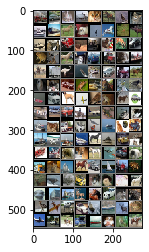

In [0]:
new_model.plot_train_images()

In [0]:
new_model.disp_summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
new_model.runModel()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH  1


Loss=1.5449798107147217 Batch_id=390 Accuracy=45.54: 100%|██████████| 391/391 [00:54<00:00,  7.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0097, Accuracy: 5663/10000 (56.63%)

EPOCH  2


Loss=0.9614211916923523 Batch_id=390 Accuracy=60.79: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0083, Accuracy: 6300/10000 (63.00%)

EPOCH  3


Loss=0.9500018954277039 Batch_id=390 Accuracy=68.46: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 7364/10000 (73.64%)

EPOCH  4


Loss=0.4459780156612396 Batch_id=390 Accuracy=75.36: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0062, Accuracy: 7406/10000 (74.06%)

EPOCH  5


Loss=0.46945062279701233 Batch_id=390 Accuracy=79.27: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0051, Accuracy: 7778/10000 (77.78%)

EPOCH  6


Loss=0.6163283586502075 Batch_id=390 Accuracy=81.64: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0050, Accuracy: 7828/10000 (78.28%)

EPOCH  7


Loss=0.4744298458099365 Batch_id=390 Accuracy=83.76: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0038, Accuracy: 8311/10000 (83.11%)

EPOCH  8


Loss=0.2568400800228119 Batch_id=390 Accuracy=85.27: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8252/10000 (82.52%)

EPOCH  9


Loss=0.3931959271430969 Batch_id=390 Accuracy=86.23: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8171/10000 (81.71%)

EPOCH  10


Loss=0.30971530079841614 Batch_id=390 Accuracy=87.27: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0036, Accuracy: 8443/10000 (84.43%)

EPOCH  11


Loss=0.2677200138568878 Batch_id=390 Accuracy=88.32: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8414/10000 (84.14%)

EPOCH  12


Loss=0.30976107716560364 Batch_id=390 Accuracy=89.10: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8359/10000 (83.59%)

EPOCH  13


Loss=0.44595885276794434 Batch_id=390 Accuracy=90.09: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8440/10000 (84.40%)

EPOCH  14


Loss=0.3447992205619812 Batch_id=390 Accuracy=91.10: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0036, Accuracy: 8519/10000 (85.19%)

EPOCH  15


Loss=0.3758086562156677 Batch_id=390 Accuracy=92.15: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0029, Accuracy: 8802/10000 (88.02%)

EPOCH  16


Loss=0.2621733844280243 Batch_id=390 Accuracy=93.51: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0025, Accuracy: 8896/10000 (88.96%)

EPOCH  17


Loss=0.12164390087127686 Batch_id=390 Accuracy=94.95: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0021, Accuracy: 9098/10000 (90.98%)

EPOCH  18


Loss=0.08995699137449265 Batch_id=390 Accuracy=96.59: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0020, Accuracy: 9168/10000 (91.68%)

EPOCH  19


Loss=0.14085379242897034 Batch_id=390 Accuracy=97.59: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0018, Accuracy: 9259/10000 (92.59%)

EPOCH  20


Loss=0.06065969541668892 Batch_id=390 Accuracy=97.87: 100%|██████████| 391/391 [00:55<00:00,  7.01it/s]


Test set: Average loss: 0.0019, Accuracy: 9227/10000 (92.27%)



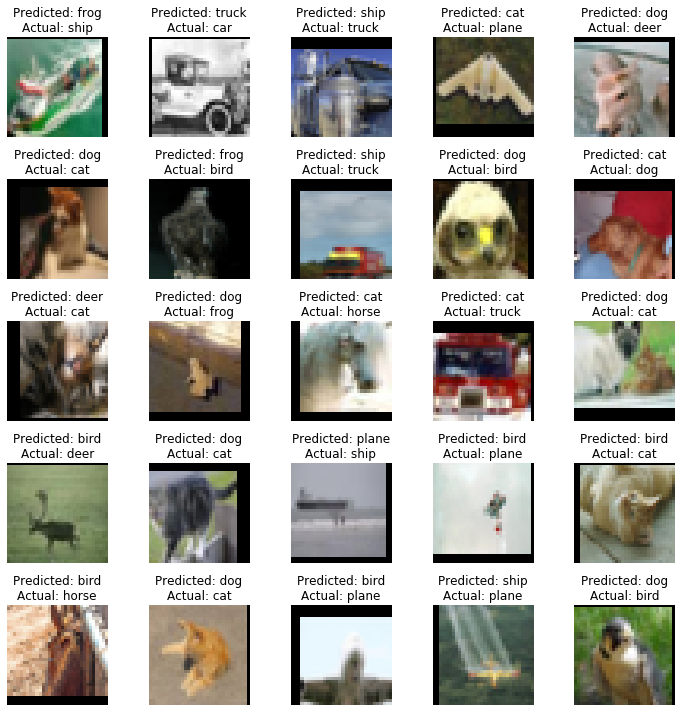

In [0]:
new_model.plot_misclassified('mis.jpg')

In [0]:
new_model.total_accuracy()

Accuracy of the network on the 10000 test images: 92 %


In [0]:
new_model.classwise_acc()


Accuracy of plane : 93 %
Accuracy of   car : 96 %
Accuracy of  bird : 81 %
Accuracy of   cat : 70 %
Accuracy of  deer : 92 %
Accuracy of   dog : 90 %
Accuracy of  frog : 88 %
Accuracy of horse : 100 %
Accuracy of  ship : 93 %
Accuracy of truck : 94 %



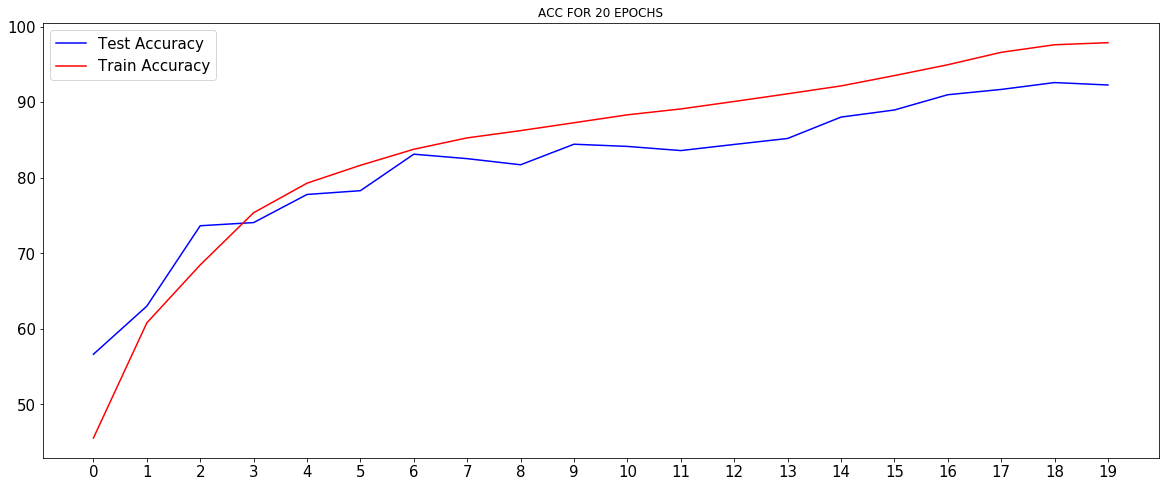

In [0]:
new_model.plot_train_test_acc()